# Module 10: Data Formats, Transformation and Preprocessing

## Lecture 1: Data Formats and Transformation

CSCI 1360: Foundations for Informatics and Analytics

## Overview and Objectives

In this lecture we will review some different formats of data that are commonly found in real-world datasets, and learn how to process them for the downstream analysis or data science tasks. By the end of this lecture you should be able:

* Realize the differenece between common data formats and how they appear in real-world datasets.

* Handle data features of different formats in a single dataset.

* Understand different numerical values scaling types.


### Required Python Packages

**scikit-learn**

scikit-learn is a free software machine learning library for the Python programming language.

`conda install scikit-learn`

**pandas**

pandas is a software library written for the Python programming language for data manipulation and analysis.

`conda install pandas`

### Part 1: Data Formats

We will cover three main data types:

* Numerical, examples: Bank transactions, employees database.

* Text, examples: Social media posts or comments, news articles

* Images, examples: Satellite images, X-rays.

Most likely, a real-world dataset is formed of a combination of two or more types of data.

At the end all will be transformed into numerical data when used in data science algorithms. Values could be either integer or floats.

For example:

* Categorical data in bank transactions database or Warehouse database.

* Social media comment data, like publish date and time, number of likes and number of edits.

* Image taken date and time or Image location using longitude and latitude.

Notice the numerical and textual values in this car prices dataset.

In [1]:
import pandas as pd

df = pd.read_csv('files/cars.csv')

df.head(5)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


**Numerical Data**

In [2]:
import pandas as pd

df = pd.read_csv('files/accidents.csv')

df.head(5)

,CASENUM,VE_FORMS,VEH_NO,PER_NO,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,...,P_SF3,LOCATION,SEX_IM,INJSEV_IM,EJECT_IM,PERALCH_IM,SEAT_IM,AGE_IM,PSUSTRAT,WEIGHT
0,201800381338,4,1,1,4,56,208,208,1,9,...,0,0,1,0,0,0,11,48,20,187.193308
1,201800381338,4,2,1,4,56,208,208,1,9,...,0,0,2,0,0,0,11,43,20,187.193308
2,201800381338,4,3,1,4,56,208,208,1,9,...,0,0,1,0,0,0,11,37,20,187.193308
3,201800381338,4,4,1,4,56,208,208,1,9,...,0,0,1,0,0,0,11,67,20,187.193308
4,201800381366,3,1,1,4,56,214,214,1,7,...,0,0,2,1,0,0,11,32,20,149.787336


**Text Data**

In [3]:
import pandas as pd

df = pd.read_csv('files/ChatGPTtweet.csv')

df.head(5)

,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,UserDescription
0,2023-02-24 07:59:26+00:00,How to hire 100x more productive team members ...,https://twitter.com/smnishad/status/1629028212...,smnishad,2009-03-04 15:50:52+00:00,False,2524,4966,0,0,"New Delhi, India",Account Planning at Adfactors Advertising
1,2023-02-24 07:59:23+00:00,Chatgtp breakfast about to start #ChatGPT #fut...,https://twitter.com/SevenKingsSch/status/16290...,SevenKingsSch,2010-05-06 09:05:00+00:00,False,1322,174,0,0,"Ilford, Redbridge",All Through. Outstanding. World Class. See Six...
2,2023-02-24 07:58:54+00:00,Build your first $100K/Year Start-up in just 2...,https://twitter.com/yournotionguy/status/16290...,yournotionguy,2023-02-09 13:22:56+00:00,False,43,10,0,0,NaN,🤓 Productivity nerd\n🗒️ Daily Notion tips & tr...
3,2023-02-24 07:58:45+00:00,Disappointed with @Samsung. My TV stopped work...,https://twitter.com/sbmza/status/1629028042340...,sbmza,2009-11-28 06:45:15+00:00,False,175,1644,0,0,NaN,Vires in Numeris
4,2023-02-24 07:58:39+00:00,The Future of Writing in a World of Artificial...,https://twitter.com/manohar12/status/162902801...,manohar12,2009-10-24 11:35:06+00:00,False,119,957,0,0,Gurgaon,be the change enabler….


**Image Data**

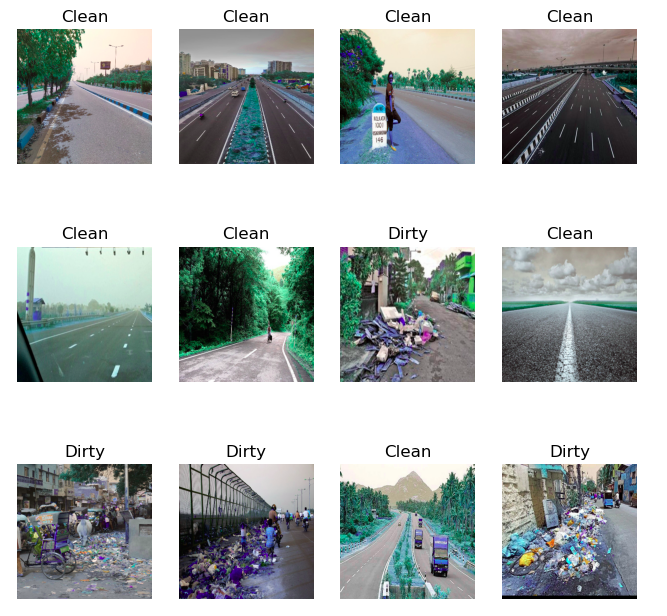

### Part 2: Transformation

#### Encoding categorical features

Some features are not given as continuous values but categorical ones.

For example a person could have the following types of features:

`["male", "female"]`

`["from Europe", "from US", "from Asia"]`

`["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]`

Such features can be efficiently coded as integers.

For instance `["male", "from US", "uses Internet Explorer"]`

could be encoded as `[0, 1, 3]`

while `["female", "from Asia", "uses Chrome"]`

would be `[1, 2, 1]`.

In [3]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

print(enc.transform([['male', 'from Europe', 'uses Safari']]))

[[0. 1. 1.]]


#### OneHotEncoder

- Represents categories as binary values.

- Encode categorical features as a one-hot numeric array.


In [5]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

#### Date and Time Features

Date features can be transformed to timestamp format.

For example, [Unix timestamp](https://en.wikipedia.org/wiki/Unix_time) is a date and time representation that measures time by the number of seconds that have elapsed since `00:00:00 UTC on 1 January 1970`.

You can employ an algorithm to do the transformation, however, you still need to check if the algorithm can parse the date format in the dataset.

Do not use a 32-bit sized variable to store the unix timestamp as on January 19, 2038, a need to an additional bit will emerge.

#### Scaling

Different features in a dataset usually have different ranges even if they share the same data type because they represent different information.

This leads to have outlier features in data that could lead to weak representation of the information by other features.

In [6]:
import pandas as pd

df = pd.read_csv('files/accidents.csv')

df.head(5)

,CASENUM,VE_FORMS,VEH_NO,PER_NO,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,...,P_SF3,LOCATION,SEX_IM,INJSEV_IM,EJECT_IM,PERALCH_IM,SEAT_IM,AGE_IM,PSUSTRAT,WEIGHT
0,201800381338,4,1,1,4,56,208,208,1,9,...,0,0,1,0,0,0,11,48,20,187.193308
1,201800381338,4,2,1,4,56,208,208,1,9,...,0,0,2,0,0,0,11,43,20,187.193308
2,201800381338,4,3,1,4,56,208,208,1,9,...,0,0,1,0,0,0,11,37,20,187.193308
3,201800381338,4,4,1,4,56,208,208,1,9,...,0,0,1,0,0,0,11,67,20,187.193308
4,201800381366,3,1,1,4,56,214,214,1,7,...,0,0,2,1,0,0,11,32,20,149.787336


To make the data analysis/prediction downstream task robust to outliers, scalers can be used.

One method to scale all the features to a given range is Standarization.

Normaliztion scales all the features based on a norm.

**StandardScaler**

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

$z = (x - u) / s$

where $u$ is the mean of the training samples or zero if with_mean=False, and $s$ is the standard deviation of the training samples or one if with_std=False.

In [3]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)

# print(scaler.mean_)


# print(scaler.scale_)


X_scaled = scaler.transform(X_train)
print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


**MinMaxScaler**

An alternative standardization is scaling features to lie between a given minimum and maximum value.

**Normalization**

Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

**Finding L2 Norm**

In [1]:
import math
a = [1,2,3,4,5]
l2 = math.sqrt(1^2 + 2^2 + 3^2 + 4^2 + 5^2)
print(l2)

1.7320508075688772


In [9]:
from sklearn.preprocessing import Normalizer
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]
transformer = Normalizer().fit(X)  # fit does nothing.
transformer

transformer.transform(X)

array([[0.8, 0.2, 0.4, 0.4],
       [0.1, 0.3, 0.9, 0.3],
       [0.5, 0.7, 0.5, 0.1]])

## Review Questions

Some questions to discuss and consider:

* In a students database of the following features: `name`, `gender` and `birth_state`. Which feature is likely to be discarded from any inference on the database? Which feature is likely to dominate a data science algorithm applied to the database if no scaling was performed?

* In your opinion, what way can help date and time parsing algorithm distinguish between `mm/dd/yyyy` and `dd/mm/yyyy` format?

* How to calculate the L1 Norm?

* What are some benefits of using OneHot Encoder? you may use Google, Bard or Chat-GPT to answer this.

## Additional Resources

 1. scikit learn, Preprocessing data, https://scikit-learn.org/stable/modules/preprocessing.html
 
 2. Grus, Joel. *Data Science from Scratch*. 2015. ISBN-13: 978-1491901427